In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.0.0

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.datasets import load_iris

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout

from tensorflow.keras.metrics import categorical_accuracy, sparse_categorical_accuracy

from tensorflow.keras.datasets import mnist

# Intro to Deep Learning

In [0]:
tf.__version__

'2.0.0'

In [0]:
iris_data = load_iris()
attributes, labels = iris_data.data, iris_data.target

In [0]:
attributes.shape

(150, 4)

In [0]:
 labels_onehot = tf.one_hot(labels, depth=len(set(labels)))

## Sigmoid - doing 3 Logistic Regressions at once

In [0]:
model = Sequential([
                    Input(shape=(4,)), 
                    Dense(3, activation="sigmoid")
])

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = "adam", 
              loss = tf.keras.losses.categorical_crossentropy, 
              metrics=[categorical_accuracy])

In [0]:
model.fit(attributes, labels_onehot, epochs=200)

In [0]:
predicted_classes = model.predict_classes(attributes)

In [0]:
predicted_classes == labels

In [0]:
accuraccy = (predicted_classes == labels).sum() / len(labels)

In [0]:
accuraccy

0.8666666666666667

In [0]:
tf.reduce_mean(categorical_accuracy(labels_onehot, model.predict(attributes))).numpy()

0.8666667

In [0]:
model.layers[0].weights

[<tf.Variable 'dense_17/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.43411285, -0.16087247,  0.06921288],
        [-0.28535616, -0.74746317, -1.1479166 ],
        [-1.0645077 ,  0.3613903 , -0.24173932],
        [-1.1165962 , -0.42414412,  1.5792328 ]], dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(3,) dtype=float32, numpy=array([-0.06663891, -0.25467935, -0.7493614 ], dtype=float32)>]

## Softmax 

In [0]:
model_softmax = Sequential([
                    Input(shape=(4,)), 
                    Dense(3, activation="softmax")
])
model_softmax.summary()

model_softmax.compile(optimizer = "adam", 
                      loss = tf.keras.losses.sparse_categorical_crossentropy, 
                      metrics=[sparse_categorical_accuracy]
                      )
model_softmax.fit(attributes, labels, epochs=200)

In [0]:
# tf.reduce_mean(sparse_categorical_accuracy(labels, model_softmax.predict_classes(attributes)))

In [0]:
# sparse_categorical_accuracy(labels, model_softmax.predict_classes(attributes))

In [0]:
type(labels)

In [0]:
type(model_softmax.predict_classes(attributes))

## MNIST dataset NNs

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Text(0.5, 1.0, '5')

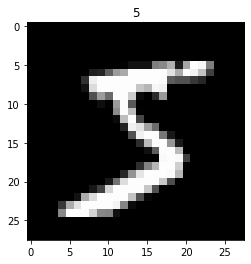

In [0]:
plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
x_train[0].shape

(28, 28)

Scaling the data

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Train shape need to be 'raveled' in one dimention. This can be done by adding a 'Flatten' layer to Sequential. 

In [0]:
mnist_model = Sequential([
                          Input(shape=(28, 28)), 
                                Flatten(), 
                                Dense(512, activation="relu"), # , kernel_regularizer="l2"
                                Dense(10, activation="softmax")  # , kernel_regularizer="l2"
])
mnist_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
mnist_model.compile(optimizer="adam", 
                    loss=tf.keras.losses.sparse_categorical_crossentropy, 
                    metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [0]:
mnist_model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1990 - sparse_categorical_accuracy: 0.9406
Epoch 2/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0796 - sparse_categorical_accuracy: 0.9757
Epoch 3/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0506 - sparse_categorical_accuracy: 0.9844
Epoch 4/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0381 - sparse_categorical_accuracy: 0.9875
Epoch 5/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0275 - sparse_categorical_accuracy: 0.9911


In [0]:
mnist_model.evaluate(x_train, y_train)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.01920106771825813, 0.99341667]

In [0]:
mnist_model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07756824347480433, 0.9767]

## Regularization

* decreasing number of epochs
* decreasing nuber of preceptrons in layers (trying with roots of 2 as hyperparameter)
* "l1" or/and "l2"
* dropout - removes percent of the data at each gradient decent

In [0]:
mnist_model = Sequential([
                          Input(shape=(28, 28)), 
                                Flatten(), 
                                Dense(32, activation="relu"), # , kernel_regularizer="l2"
                                Dropout(0.2), 
                                Dense(16, activation="relu"), 
                                Dropout(0.2), 
                                Dense(10, activation="softmax")  # , kernel_regularizer="l2"
])
mnist_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________

In [0]:
mnist_model.compile(optimizer="adam", 
                    loss=tf.keras.losses.sparse_categorical_crossentropy, 
                    metrics=[tf.keras.metrics.sparse_categorical_accuracy])
mnist_model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.6813 - sparse_categorical_accuracy: 0.7865
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4091 - sparse_categorical_accuracy: 0.8799
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3517 - sparse_categorical_accuracy: 0.8957
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3246 - sparse_categorical_accuracy: 0.9046
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3088 - sparse_categorical_accuracy: 0.9082


In [0]:
mnist_model.evaluate(x_train, y_train)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14729024219575026, 0.95641667]

In [0]:
mnist_model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.16865889717191457, 0.9501]